In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data/ClusterExample.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


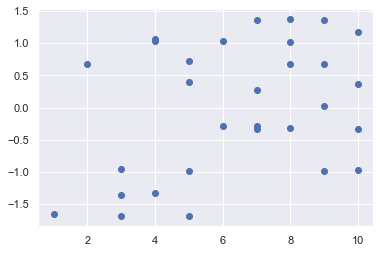

In [3]:
plt.scatter(data["Satisfaction"],data["Loyalty"])

In [5]:
x = data.copy()

In [6]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[229.16347000000002,
 74.51511402714934,
 50.136244913419915,
 34.42895833333333,
 26.7682625,
 21.57676333333333]

Text(0, 0.5, 'Within-cluster Sum of Squares')

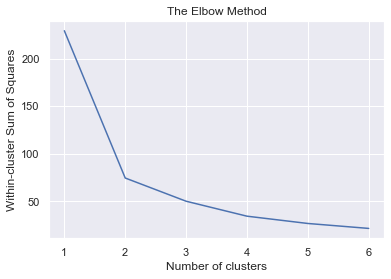

In [7]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [17]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [18]:
kmeans.predict(x)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [19]:
data["Clusters"] = kmeans.predict(x)
data

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


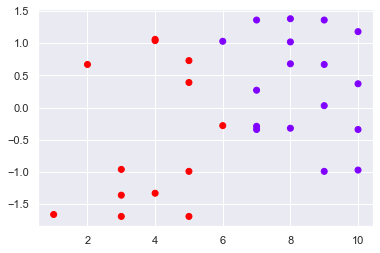

In [20]:
plt.scatter(data["Satisfaction"],data["Loyalty"],c=data["Clusters"],cmap="rainbow")

In [21]:
# Standardize
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [23]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.586212092192189,
 5.326631124753926,
 4.358871893303257,
 3.731185392455718]

Text(0, 0.5, 'Within-cluster Sum of Squares')

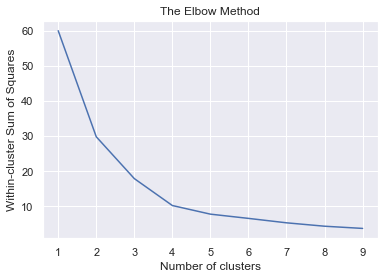

In [24]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [29]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

KMeans(n_clusters=4)

In [30]:
data["Clusters 2"] = kmeans_new.predict(x_scaled)
data

,Satisfaction,Loyalty,Clusters,Clusters 2
0,4,-1.33,1,1
1,6,-0.28,1,2
2,5,-0.99,1,1
3,7,-0.29,0,2
4,4,1.06,1,3
5,1,-1.66,1,1
6,10,-0.97,0,2
7,8,-0.32,0,2
8,8,1.02,0,0
9,8,0.68,0,0


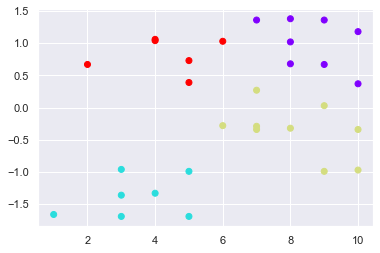

In [31]:
plt.scatter(data["Satisfaction"],data["Loyalty"],c=data["Clusters 2"],cmap="rainbow")